In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_country=pd.read_csv('dictionary.csv',sep=',')
df_winter=pd.read_csv('winter.csv',sep=',')
df_summer=pd.read_csv('summer.csv',sep=',')

<b>Pregunta 1: En un histograma, visualizar el GDP per Capita de cada país. Bonus: ordenar el histograma en orden decreciente.</b>

In [158]:
#Filtramos los datos realmente útiles: Country y GDP per Capita
df_ex1=df_country[['Code','GDP per Capita']]
df_ex1[:3]

,Code,GDP per Capita
0,AFG,594.323081
1,ALB,3945.217582
2,ALG,4206.031232


In [159]:
#Ordenamos los datos segúnel valor del GDP per Capita para simplificar la visualización
df_ex1_sorted=df_ex1.sort_values(by=['GDP per Capita'], ascending=False)
df_ex1_sorted[:3]

,Code,GDP per Capita
108,LUX,101449.968168
175,SUI,80945.079219
135,NOR,74400.369777


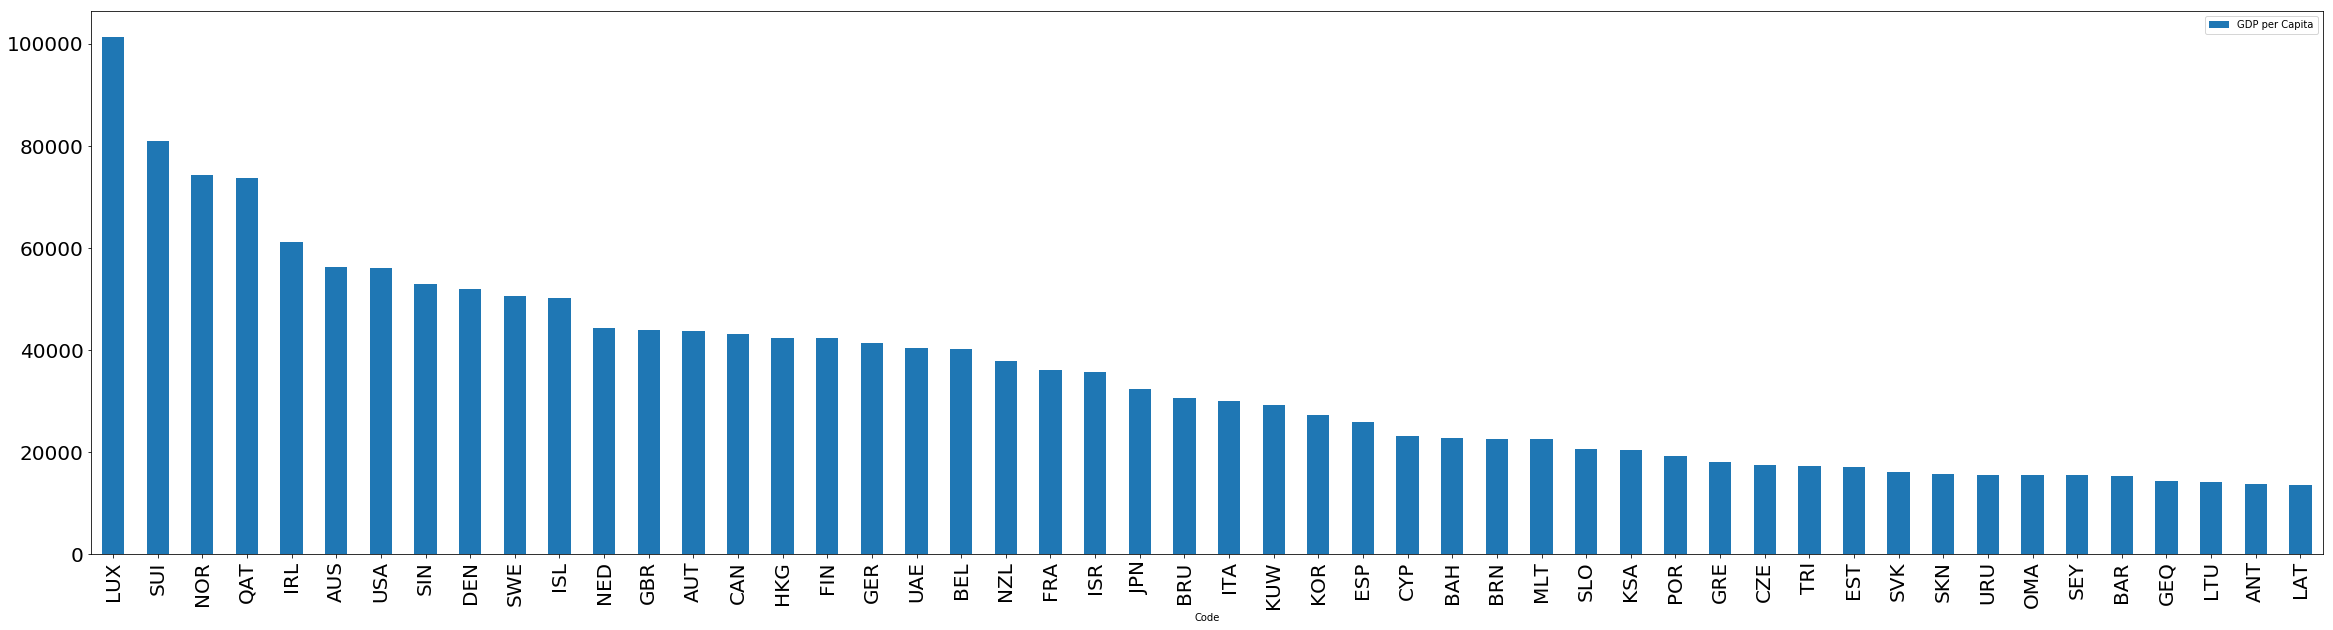

In [160]:
#Visualizamos en un histograma
df_ex1_sorted[:50].plot(kind='bar',figsize=(40,10), fontsize=20, x='Code')
plt.show()

<b>Pregunta 2:¿Cuál es el número de medalla por cada país, sin diferenciar el tipo de medalla, en los juegos de verano? Visualizar en un histograma.</b>

In [36]:
#La columna 'Country' del dataset 'summer' contiene los datos que necesitamos
df_ex2=df_summer['Country']
df_ex2[:5]

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: Country, dtype: object

In [34]:
#Contamos el número de aparición de cada país. El metodo value_count() devuelve una lista ya ordenada.
df_ex2_results=df_ex2.value_counts()
df_ex2_results[:5]

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
Name: Country, dtype: int64

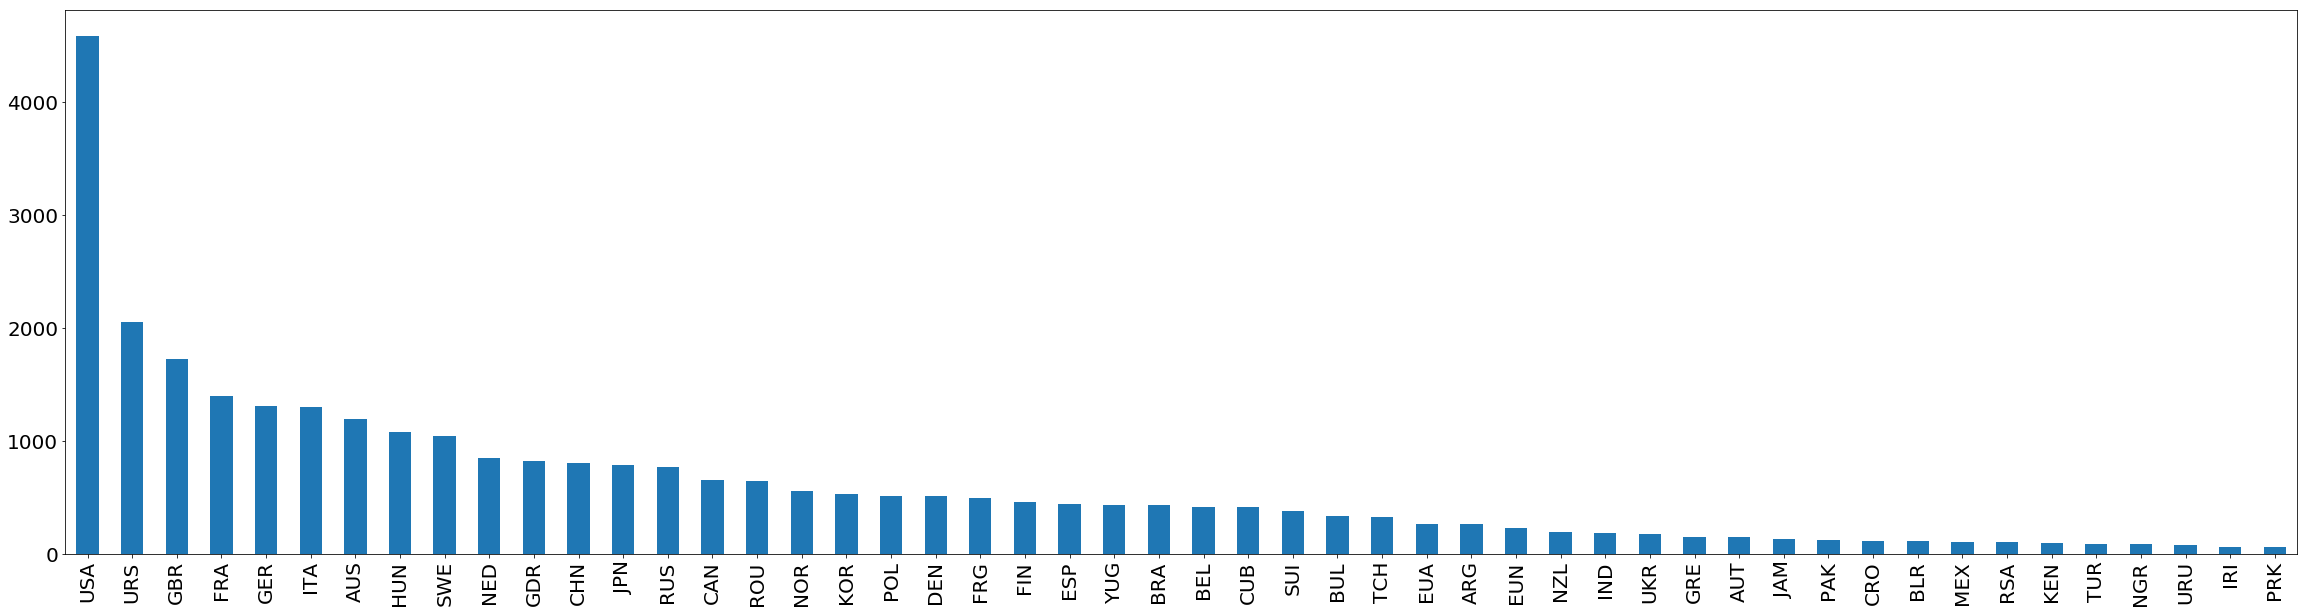

In [37]:
#Visualizamos el resultado en un histograma.
df_ex2_results[:50].plot(kind='bar',figsize=(40,10), fontsize=20, x='Country')
plt.show()

<b>Pregunta 3. ¿Cuál es el número de medalla por cada país, diferenciando el color de la medalla, en los juegos de verano? Visualizar en un histograma.</b>

In [51]:
#Seleccionamos los datos que nos interesan
df_ex3=df_summer[['Country','Medal']]
df_ex3[:5]

,Country,Medal
0,HUN,Gold
1,AUT,Silver
2,GRE,Bronze
3,GRE,Gold
4,GRE,Silver


In [143]:
import warnings
warnings.filterwarnings('ignore')

#Agregamos una columna llena de '1' para facilitar  el conteo.
#Una serie de datos llena de '1':
values=[]
i=0
while i<len(df_ex3):
    values.insert(i,1)
    i=i+1
count_column = pd.Series(values)

#Agregación de la columna:
df_ex3.loc[:,'Count']=count_column

df_ex3[:5]

,Country,Medal,Count
0,HUN,Gold,1
1,AUT,Silver,1
2,GRE,Bronze,1
3,GRE,Gold,1
4,GRE,Silver,1


In [123]:
#Agrupamos los datos según el país y el tipo de medalla:
df_ex3_results=df_ex3.groupby(['Country','Medal']).count()
df_ex3_results_sorted=df_ex3_results.sort_values(by=['Count'], ascending=False)

df_ex3_results_sorted[:15]

Count
Country Medal        
USA     Gold     2235
        Silver   1252
        Bronze   1098
URS     Gold      838
        Silver    627
GBR     Silver    621
URS     Bronze    584
GBR     Bronze    553
        Gold      546
FRA     Bronze    497
        Silver    491
ITA     Gold      476
GER     Bronze    475
AUS     Bronze    472
GER     Gold      452

In [144]:
#Ejemplo de como transposar una matrice
df_c=df_ex3_results_sorted.loc['USA']
df_c_t=df_c.transpose()
df_c_t['Country']='USA'
df_c_t

Medal,Gold,Silver,Bronze
Count,2235,1252,1098


In [145]:
#Los datos de la celda anteriores corresponden a lo que necesitamos pero no son simples de visualizar en un solo paso
# ya que no corresponden a una matrice simple.
# Podemos crear una nueva DataFrame transformando el arreglo anterior para tener una matrice con 3 columnas: 
#'Gold', 'Silver', 'Bronze'

#Nuestra nueva matrice. Vacia por el momento.
results=pd.DataFrame()

#Transposamos todos los datos por cada país
for c in df_ex3['Country'].drop_duplicates():
    try:
        df_c=df_ex3_results_sorted.loc[c]
        df_c_t=df_c.transpose()
        df_c_t['Country']=c
        results = pd.concat([df_c_t,results])
    except TypeError:
        print("End")

results=results.sort_values(by=['Gold'], ascending=False)
results[:10]

End


,Bronze,Country,Gold,Silver
Count,1098.0,USA,2235.0,1252.0
Count,584.0,URS,838.0,627.0
Count,553.0,GBR,546.0,621.0
Count,404.0,ITA,476.0,416.0
Count,475.0,GER,452.0,378.0
Count,351.0,HUN,412.0,316.0
Count,497.0,FRA,408.0,491.0
Count,328.0,SWE,349.0,367.0
Count,225.0,GDR,329.0,271.0
Count,472.0,AUS,312.0,405.0


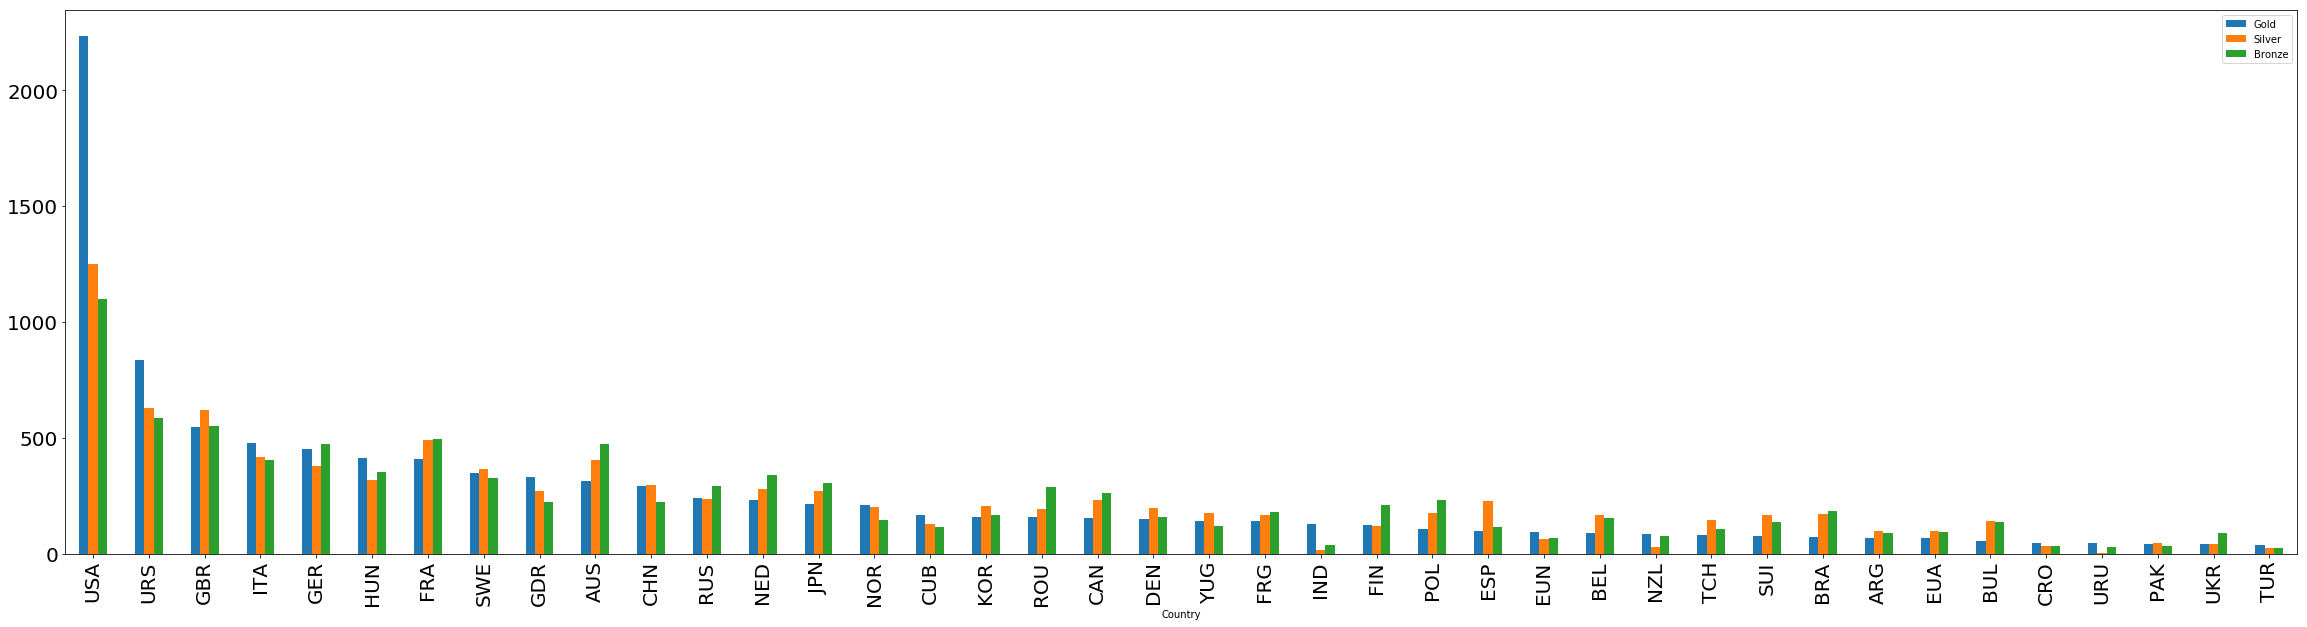

In [146]:
#Ahora podemos visualizar el número de medallas por cada tipo de medallas y cada país
results[:40].plot(kind='bar',figsize=(40,10), fontsize=20, x='Country', y=['Gold','Silver', 'Bronze'])
plt.show()

<b>Pregunta 4: ¿Cuál es el número de medalla por cada país, diferenciando el color de la medalla, en los juegos de verano y invierno? Visualizar en un mismo histograma.</b>

In [149]:
#Seleccionamos los datos que nos interesan, concatenando los datos 'summer' y 'winter'
df_ex4_a=df_summer[['Country','Medal']]
df_ex4_b=df_winter[['Country','Medal']]
df_ex4=pd.concat([df_ex4_a,df_ex4_b])
df_ex4[:5]

,Country,Medal
0,HUN,Gold
1,AUT,Silver
2,GRE,Bronze
3,GRE,Gold
4,GRE,Silver


In [150]:
#Mismo proceso que para la pregunta 3

import warnings
warnings.filterwarnings('ignore')

#Agregamos una columna llena de '1' para facilitar  el conteo.
#Una serie de datos llena de '1':
values=[]
i=0
while i<len(df_ex4):
    values.insert(i,1)
    i=i+1
count_column = pd.Series(values)

#Agregación de la columna:
df_ex4.loc[:,'Count']=count_column

df_ex4[:5]

,Country,Medal,Count
0,HUN,Gold,1
1,AUT,Silver,1
2,GRE,Bronze,1
3,GRE,Gold,1
4,GRE,Silver,1


In [152]:
#Agrupamos los datos según el país y el tipo de medalla:
df_ex4_results=df_ex4.groupby(['Country','Medal']).count()
df_ex4_results_sorted=df_ex4_results.sort_values(by=['Count'], ascending=False)

df_ex4_results_sorted[:15]

Count
Country Medal        
USA     Gold     2402
        Silver   1571
        Bronze   1265
URS     Gold     1088
        Silver    724
        Bronze    677
GBR     Silver    632
GER     Gold      589
GBR     Bronze    587
        Gold      580
FRA     Bronze    578
GER     Bronze    572
ITA     Gold      534
FRA     Silver    526
SWE     Bronze    505

In [153]:
#Los datos de la celda anteriores corresponden a lo que necesitamos pero no son simples de visualizar en un solo paso
# ya que no corresponden a una matrice simple.
# Podemos crear una nueva DataFrame transformando el arreglo anterior para tener una matrice con 3 columnas: 
#'Gold', 'Silver', 'Bronze'

#Nuestra nueva matrice. Vacia por el momento.
results_ex4=pd.DataFrame()

#Transposamos todos los datos por cada país
for c in df_ex4['Country'].drop_duplicates():
    try:
        df_c=df_ex4_results_sorted.loc[c]
        df_c_t=df_c.transpose()
        df_c_t['Country']=c
        results_ex4 = pd.concat([df_c_t,results_ex4])
    except TypeError:
        print("End")

results_ex4=results_ex4.sort_values(by=['Gold'], ascending=False)
results_ex4[:10]

End


,Bronze,Country,Gold,Silver
Count,1265.0,USA,2402.0,1571.0
Count,677.0,URS,1088.0,724.0
Count,572.0,GER,589.0,504.0
Count,587.0,GBR,580.0,632.0
Count,481.0,ITA,534.0,473.0
Count,505.0,SWE,476.0,496.0
Count,369.0,CAN,470.0,435.0
Count,578.0,FRA,444.0,526.0
Count,359.0,HUN,412.0,320.0
Count,279.0,GDR,387.0,321.0


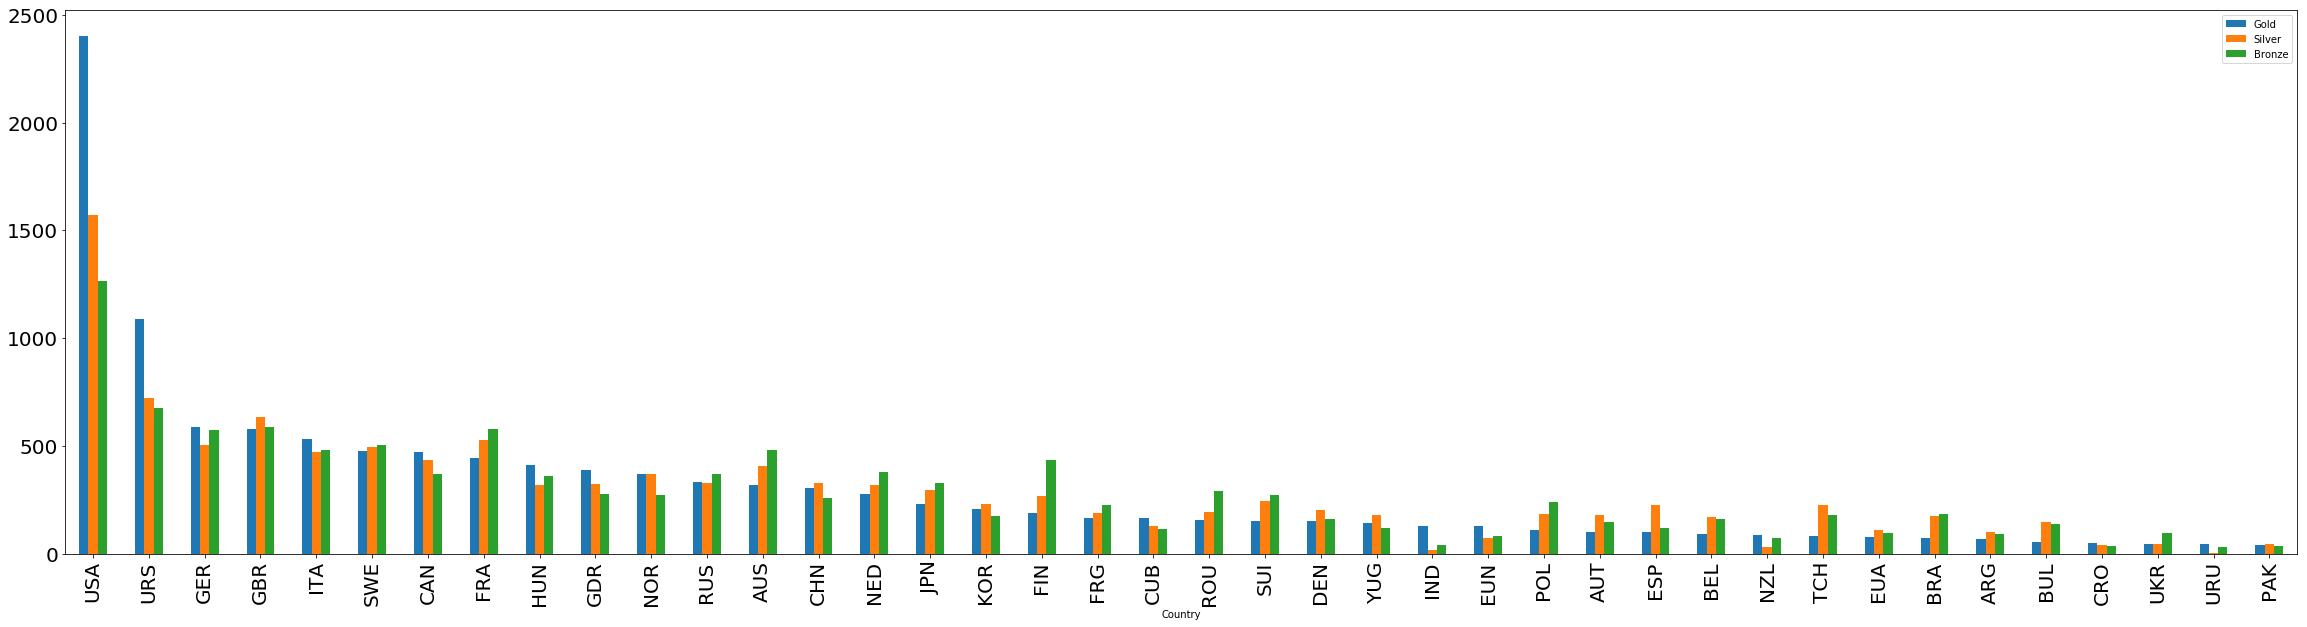

In [154]:
#Ahora podemos visualizar el número de medallas por cada tipo de medalla y cada país
results_ex4[:40].plot(kind='bar',figsize=(40,10), fontsize=20, x='Country', y=['Gold','Silver', 'Bronze'])
plt.show()

<b>Pregunta 5: En un scatter plot, mostrar cuál es la relación entre la variable GDP per Capita y el número de medalla total obtenido por cada país. Bonus: Mostrar la recta de regresión y/o calcular el coeficiente de correlación.</b>

In [163]:
df_ex5_a=results_ex4.reset_index()[['Country','Gold']]
df_ex5_b=df_ex1_sorted
df_ex5=pd.merge(df_ex5_a,df_ex5_b,left_on='Country',right_on='Code')
df_ex5[:10]

,Country,Gold,Code,GDP per Capita
0,USA,2402.0,USA,56115.718426
1,GER,589.0,GER,41313.313995
2,GBR,580.0,GBR,43875.969614
3,ITA,534.0,ITA,29957.804315
4,SWE,476.0,SWE,50579.673649
5,CAN,470.0,CAN,43248.529909
6,FRA,444.0,FRA,36205.568102
7,HUN,412.0,HUN,12363.543460
8,NOR,368.0,NOR,74400.369777
9,RUS,333.0,RUS,9092.580536


In [166]:
df_ex5_util=df_ex5[['Country','Gold','GDP per Capita']]
df_ex5_util[:10]

,Country,Gold,GDP per Capita
0,USA,2402.0,56115.718426
1,GER,589.0,41313.313995
2,GBR,580.0,43875.969614
3,ITA,534.0,29957.804315
4,SWE,476.0,50579.673649
5,CAN,470.0,43248.529909
6,FRA,444.0,36205.568102
7,HUN,412.0,12363.543460
8,NOR,368.0,74400.369777
9,RUS,333.0,9092.580536


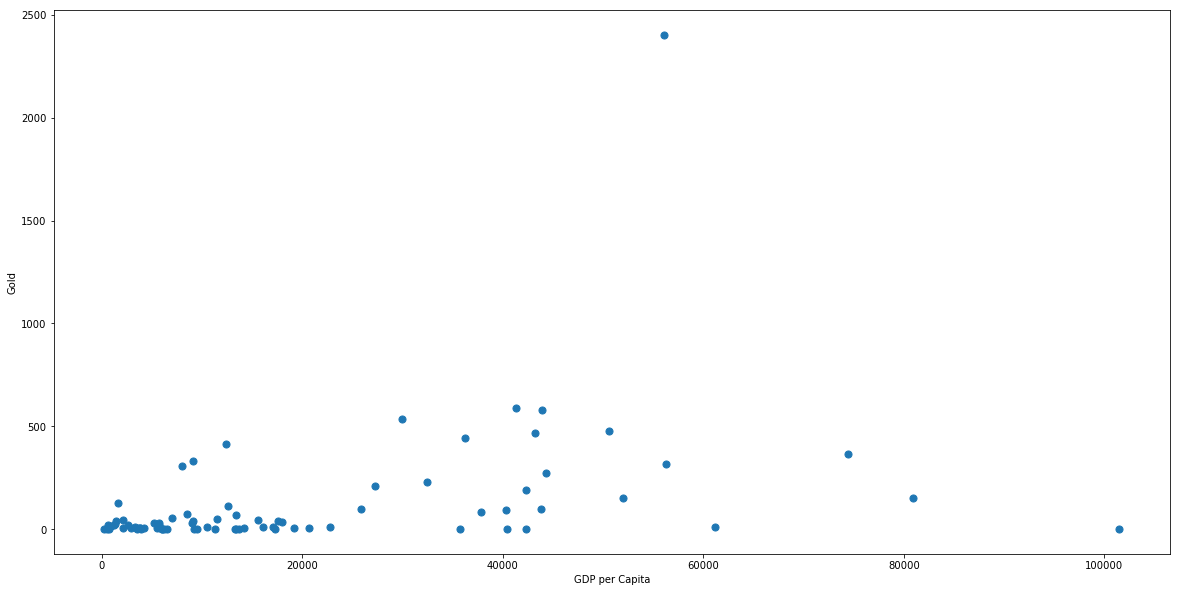

In [178]:
df_ex5_util.plot(kind='scatter',x='GDP per Capita',y='Gold',figsize=(20,10), fontsize=10, s=50)
plt.show()

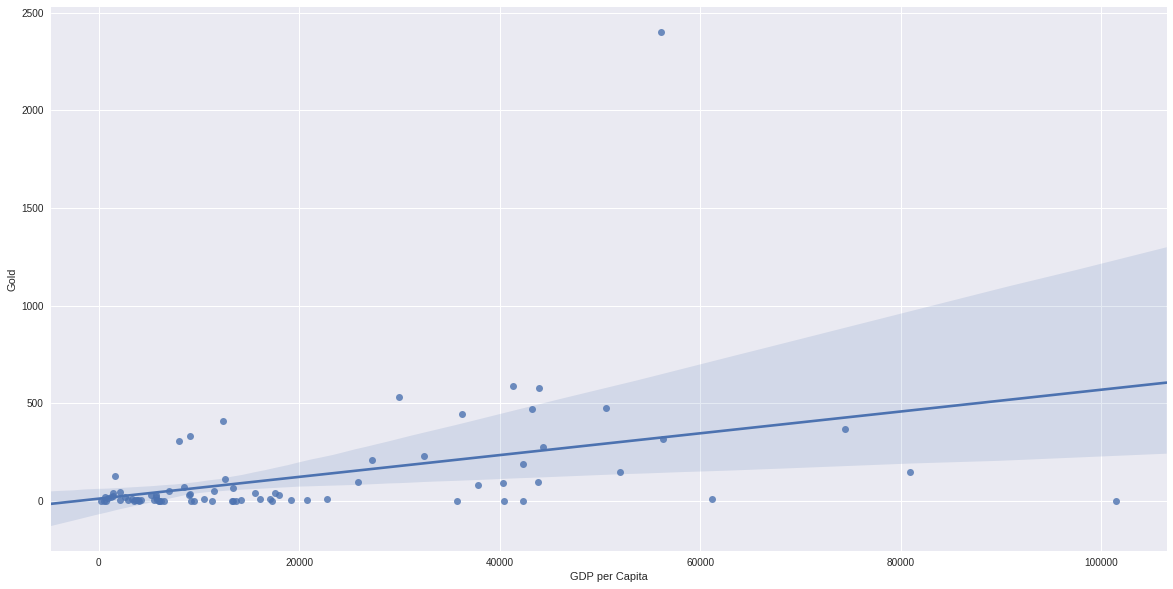

In [191]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(20,10)})
sns.regplot(x="GDP per Capita", y="Gold", data=df_ex5_util)
plt.show()

<b> En conclusión, observamos que existe una relación entre ciertas metricas economicas (GDP per Capita) y el número de medallas que gana un país en los juegos olímpicos.</b>